In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')

In [3]:
# Read data

print(df.shape)
df.head(15)

(3000, 12)


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
5,Japan,23,Other,Moderate,Balanced,2.7,Moderate,Anxiety,50,3.3,8.4,7.2
6,Japan,49,Male,Moderate,Junk Food,6.6,Low,Anxiety,28,7.2,5.6,6.9
7,Brazil,46,Other,Low,Vegetarian,6.3,High,PTSD,46,5.6,3.5,1.1
8,India,60,Male,High,Vegetarian,4.7,Low,Anxiety,33,6.6,3.7,5.2
9,Germany,19,Female,Moderate,Vegan,3.3,Low,PTSD,44,7.7,3.0,7.7


In [4]:
# Overview
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


,0
Country,0
Age,0
Gender,0
Exercise Level,0
Diet Type,0
Sleep Hours,0
Stress Level,0
Mental Health Condition,595
Work Hours per Week,0
Screen Time per Day (Hours),0


In [5]:
print(df.columns)

Index(['Country', 'Age', 'Gender', 'Exercise Level', 'Diet Type',
       'Sleep Hours', 'Stress Level', 'Mental Health Condition',
       'Work Hours per Week', 'Screen Time per Day (Hours)',
       'Social Interaction Score', 'Happiness Score'],
      dtype='object')


In [6]:
for column in df.columns:
    print(f"\n--- {column} ---")
    print(df[column].value_counts())


--- Country ---
Country
USA          446
Japan        439
Australia    434
India        434
Canada       428
Brazil       415
Germany      404
Name: count, dtype: int64

--- Age ---
Age
38    85
45    78
34    78
57    76
39    75
64    74
49    73
36    73
21    72
62    71
25    70
30    69
55    69
28    69
37    69
40    68
52    67
46    66
58    66
20    66
32    65
47    64
54    64
51    64
63    63
41    63
27    61
26    61
53    61
42    61
44    60
29    60
43    60
35    59
18    59
56    58
60    58
22    57
23    56
61    56
59    54
19    54
50    53
33    52
31    50
48    49
24    44
Name: count, dtype: int64

--- Gender ---
Gender
Female    1024
Other      996
Male       980
Name: count, dtype: int64

--- Exercise Level ---
Exercise Level
Low         1033
Moderate     998
High         969
Name: count, dtype: int64

--- Diet Type ---
Diet Type
Junk Food     637
Balanced      625
Vegetarian    592
Vegan         573
Keto          573
Name: count, dtype: int64

--- Slee

<Axes: title={'center': 'Mental Health Condition Distribution'}, xlabel='Mental Health Condition'>

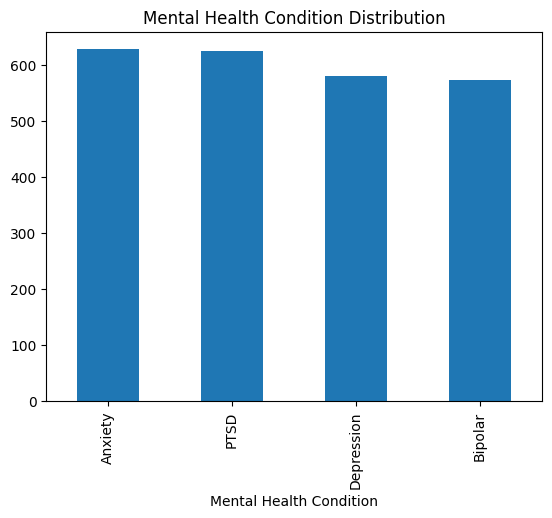

In [7]:
df['Mental Health Condition'].value_counts().plot(kind='bar', title='Mental Health Condition Distribution')


In [8]:
pip install fuzzywuzzy[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.4 MB/s eta 0:00:00


In [9]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Example: checking for similar values in 'Exercise Level'
unique_values = df['Exercise Level'].unique()

# Compare each value with all others using fuzzy ratio
for i, val in enumerate(unique_values):
    for comp in unique_values[i+1:]:
        score = fuzz.ratio(val, comp)
        if score >= 80 and val != comp:
            print(f"Possible typo: '{val}' vs '{comp}' - Similarity: {score}%")

No results: There are no spelling mistakes or close duplicates in the values of the column you tested (e.g. 'Exercise Level'), based on the fuzzy match threshold used (default: ≥80%).


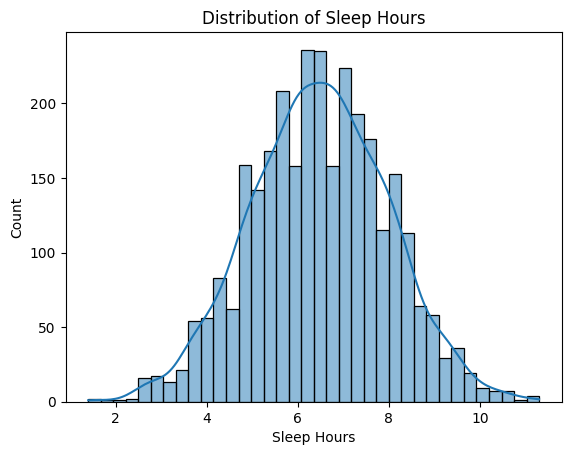

In [10]:
# Visualize distributions
sns.histplot(df['Sleep Hours'], kde=True)
plt.title('Distribution of Sleep Hours')
plt.show()

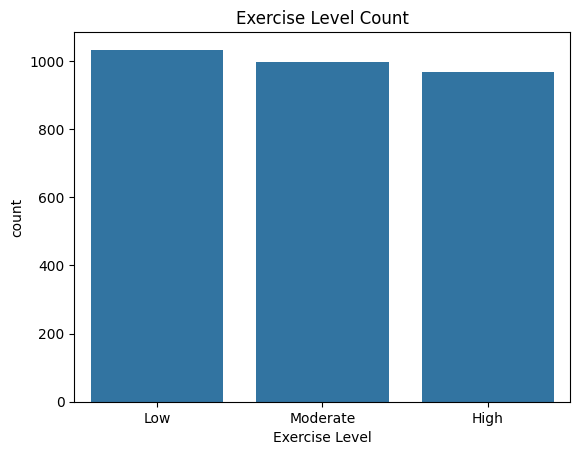

In [11]:
sns.countplot(x='Exercise Level', data=df)
plt.title('Exercise Level Count')
plt.show()

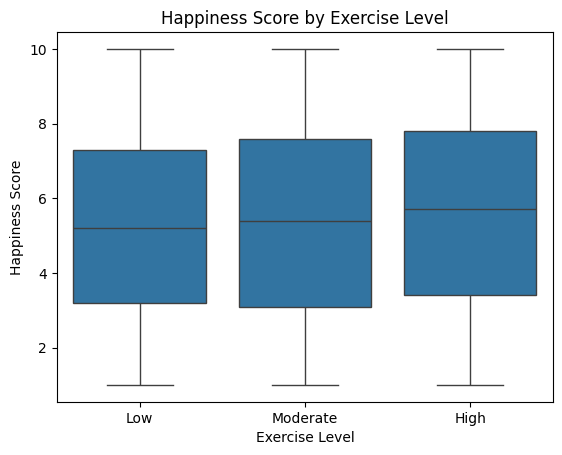

In [12]:
# 5. Compare variables (Boxplot)
sns.boxplot(x='Exercise Level', y='Happiness Score', data=df)
plt.title('Happiness Score by Exercise Level')
plt.show()

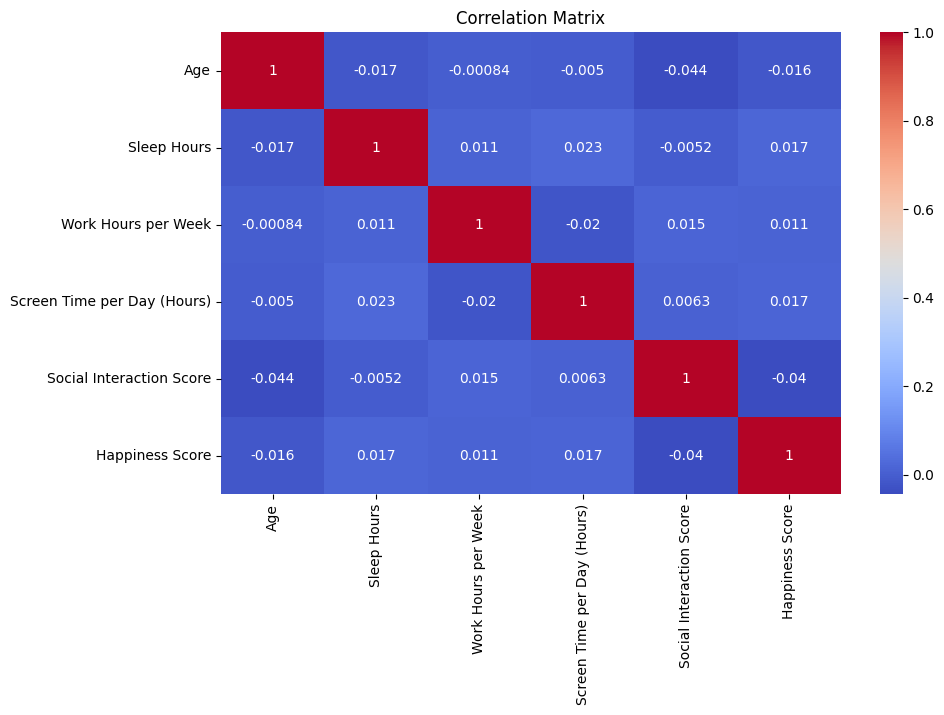

In [13]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

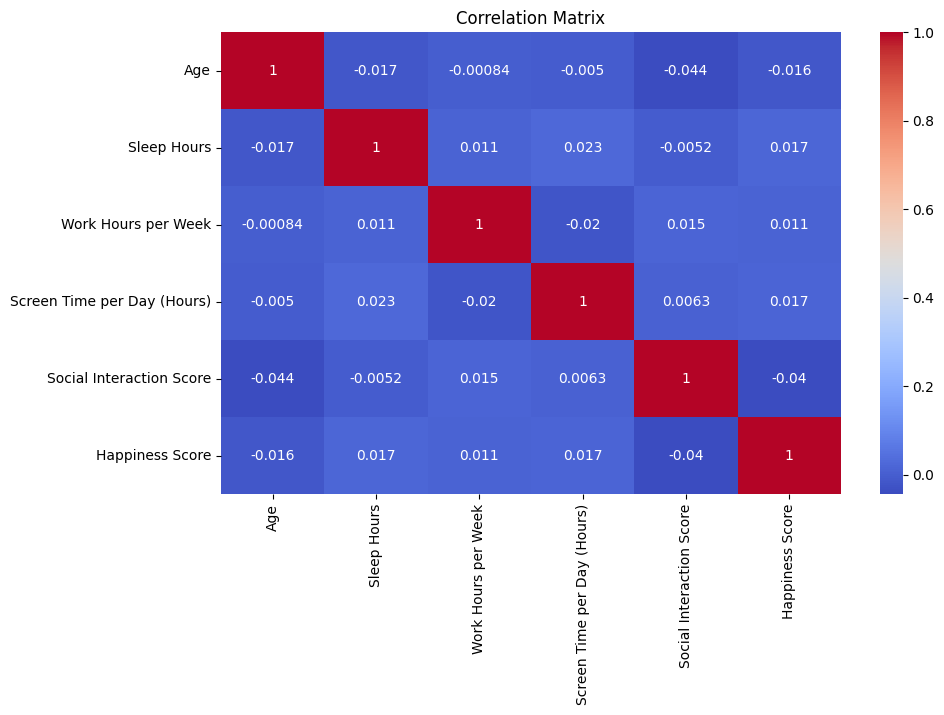

In [14]:
# 6. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

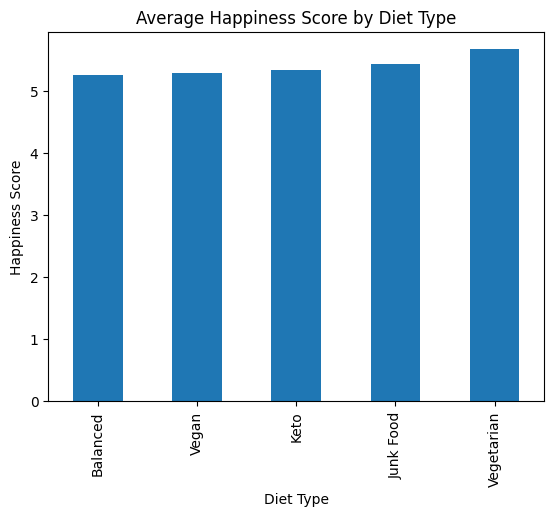

In [15]:
# 7. Grouped analysis
df.groupby('Diet Type')['Happiness Score'].mean().sort_values().plot(kind='bar')
plt.title('Average Happiness Score by Diet Type')
plt.ylabel('Happiness Score')
plt.show()

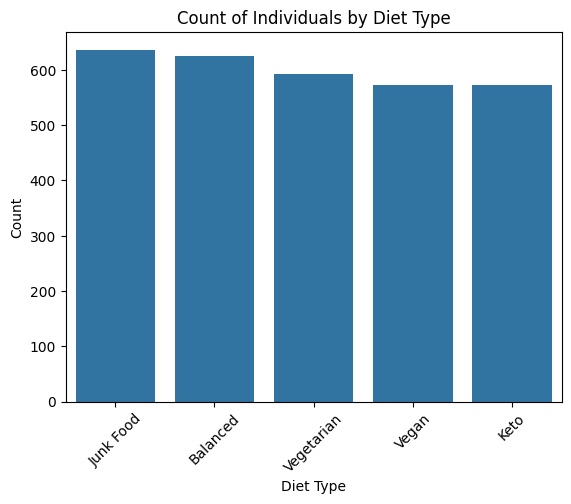

In [16]:
# Count of each Diet Type
diet_counts = df['Diet Type'].value_counts()

# Bar plot
sns.barplot(x=diet_counts.index, y=diet_counts.values)
plt.title('Count of Individuals by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

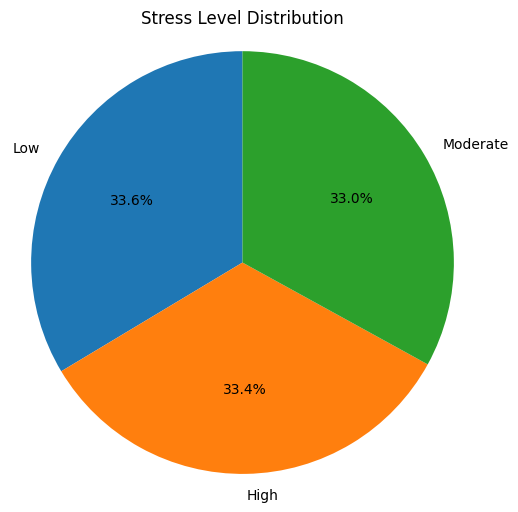

In [17]:
# Count of each Stress Level
stress_counts = df['Stress Level'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(stress_counts.values, labels=stress_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Stress Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

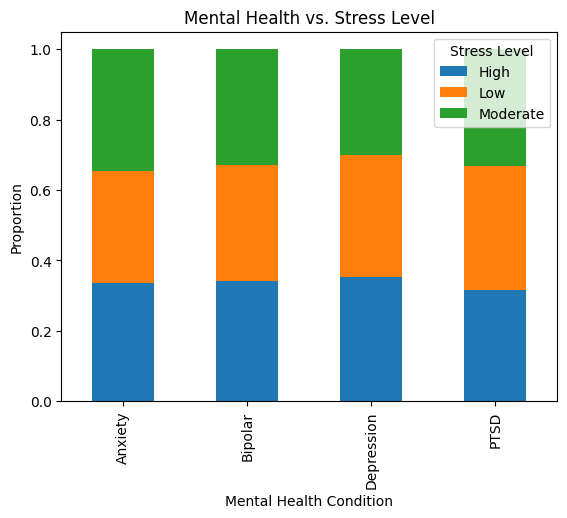

In [18]:
# 8. Crosstab (Mental health vs. stress)
pd.crosstab(df['Mental Health Condition'], df['Stress Level'], normalize='index') \
  .plot(kind='bar', stacked=True)
plt.title('Mental Health vs. Stress Level')
plt.ylabel('Proportion')
plt.show()

In [19]:
print(df['Mental Health Condition'].value_counts())

Mental Health Condition
Anxiety       628
PTSD          624
Depression    580
Bipolar       573
Name: count, dtype: int64


In [20]:
# Create binary target column
df['Mental_Health_Binary'] = df['Mental Health Condition'].apply(
    lambda x: 0 if str(x).strip().lower() == 'nan' or str(x).strip().lower() == 'none' else 1
)

In [21]:
print(df['Mental_Health_Binary'].value_counts())

Mental_Health_Binary
1    2405
0     595
Name: count, dtype: int64


1    (number of people with conditions)
0    (number of people with no condition)

In [22]:
# Drop original
df.drop('Mental Health Condition', axis=1, inplace=True)

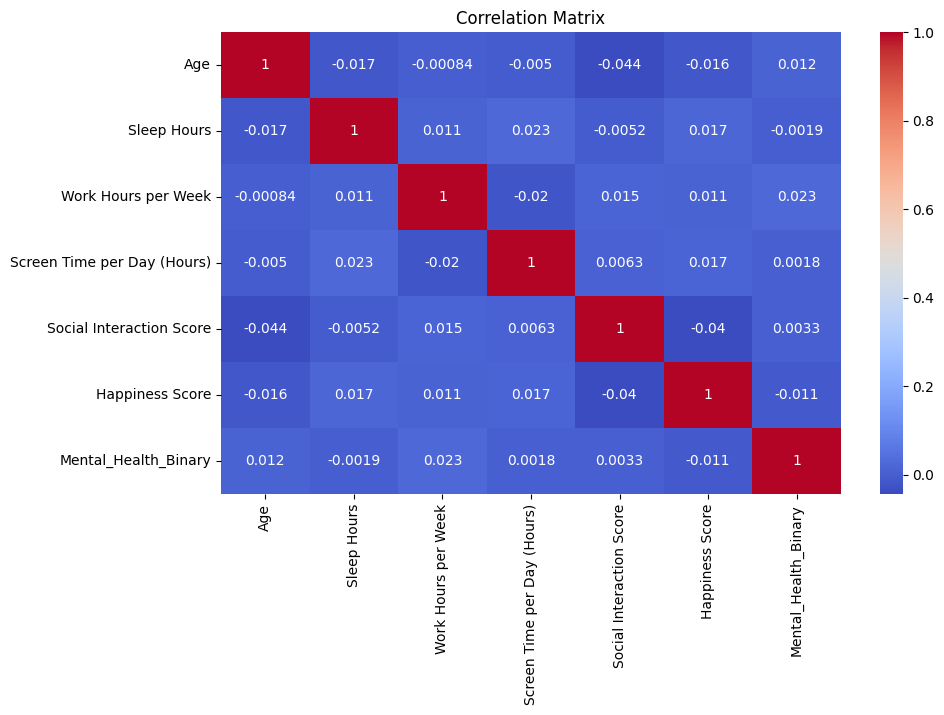

In [23]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
print(df.shape)
df.head(15)

(3000, 12)


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Mental_Health_Binary
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,21,4.0,7.8,6.5,0
1,Australia,31,Male,Moderate,Vegan,4.9,Low,48,5.2,8.2,6.8,1
2,Japan,37,Female,Low,Vegetarian,7.2,High,43,4.7,9.6,9.7,0
3,Brazil,35,Male,Low,Vegan,7.2,Low,43,2.2,8.2,6.6,1
4,Germany,46,Male,Low,Balanced,7.3,Low,35,3.6,4.7,4.4,1
5,Japan,23,Other,Moderate,Balanced,2.7,Moderate,50,3.3,8.4,7.2,1
6,Japan,49,Male,Moderate,Junk Food,6.6,Low,28,7.2,5.6,6.9,1
7,Brazil,46,Other,Low,Vegetarian,6.3,High,46,5.6,3.5,1.1,1
8,India,60,Male,High,Vegetarian,4.7,Low,33,6.6,3.7,5.2,1
9,Germany,19,Female,Moderate,Vegan,3.3,Low,44,7.7,3.0,7.7,1


Feature Engineering to improve modelling



1.   Binning: Convert Continuous/Ordinal Values into Categories
2.   Create Interaction Features
3.   One-Hot Encode the New Categories
4.   Update Feature Set


In [25]:
#Sleep Hours --> Sleep Category
def bin_sleep(hours):
    if hours < 5:
        return 'Very Low'
    elif 5 <= hours < 6.5:
        return 'Low'
    elif 6.5 <= hours < 8:
        return 'Normal'
    else:
        return 'High'

df['Sleep_Category'] = df['Sleep Hours'].apply(bin_sleep)


In [26]:
def bin_stress(level):
    # Convert stress levels to numerical representation before binning
    stress_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
    numeric_level = stress_mapping.get(level, 0)  # Default to 0 for any unexpected values

    if numeric_level <= 1:
        return 'Low'
    elif numeric_level <= 2:
        return 'Moderate'
    else:
        return 'High'

df['Stress_Category'] = df['Stress Level'].apply(bin_stress)

In [27]:
#Low Sleep + High Stress → Risky Lifestyle
df['LowSleep_HighStress'] = (
    (df['Sleep_Category'].isin(['Very Low', 'Low'])) &
    (df['Stress_Category'] == 'High')
).astype(int)


In [28]:
# Create Interaction Features
df['LowSleep_HighStress'] = (
    (df['Sleep_Category'].isin(['Very Low', 'Low'])) &
    (df['Stress_Category'] == 'High')
).astype(int)

In [29]:
#No Exercise + High Screen Time
df['NoExercise_HighScreenTime'] = (
    (df['Exercise Level'] == 'Sedentary') &
    (df['Screen Time per Day (Hours)'] > 6)
).astype(int)

In [30]:
# One-Hot Encode the New Categories
df = pd.get_dummies(df, columns=['Sleep_Category', 'Stress_Category'], drop_first=True)


In [31]:
# Update Feature Set
features = [
    'Age', 'Gender', 'Exercise Level', 'Diet Type',
    'Stress_Category_Low', 'Stress_Category_Moderate',
    'Sleep_Category_Low', 'Sleep_Category_Normal',
    'LowSleep_HighStress',
    'NoExercise_HighScreenTime',
    'Work Hours per Week', 'Screen Time per Day (Hours)',
    'Social Interaction Score', 'Happiness Score'
]


In [32]:
X = df[features]
X_encoded = pd.get_dummies(X, drop_first=True)

y = df['Mental_Health_Binary']


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42)


##Apply Smote
SMOTEENN: Over-sampling using SMOTE and cleaning using ENN.

In [34]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42)

In [36]:
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)


In [37]:
import numpy as np

unique, counts = np.unique(y_train_resampled, return_counts=True)
print("New class distribution after SMOTEENN:", dict(zip(unique, counts)))


New class distribution after SMOTEENN: {np.int64(0): np.int64(1473), np.int64(1): np.int64(649)}


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate on original test set
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.41      0.28       179
           1       0.81      0.64      0.71       721

    accuracy                           0.59       900
   macro avg       0.52      0.52      0.50       900
weighted avg       0.69      0.59      0.63       900

Confusion Matrix:
[[ 73 106]
 [262 459]]
ROC-AUC Score: 0.5096312539226245


Logistic Regression based on SMOTEENN

In [39]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [40]:
#Train Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

In [41]:
#Predict and Evaluate on the Test Set
y_pred_logreg = logreg_model.predict(X_test)

print("🔍 Logistic Regression – Classification Report")
print(classification_report(y_test, y_pred_logreg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("ROC-AUC Score:", roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1]))


🔍 Logistic Regression – Classification Report
              precision    recall  f1-score   support

           0       0.20      0.54      0.29       179
           1       0.80      0.47      0.59       721

    accuracy                           0.48       900
   macro avg       0.50      0.50      0.44       900
weighted avg       0.68      0.48      0.53       900

Confusion Matrix:
[[ 96  83]
 [382 339]]
ROC-AUC Score: 0.5140207192059445


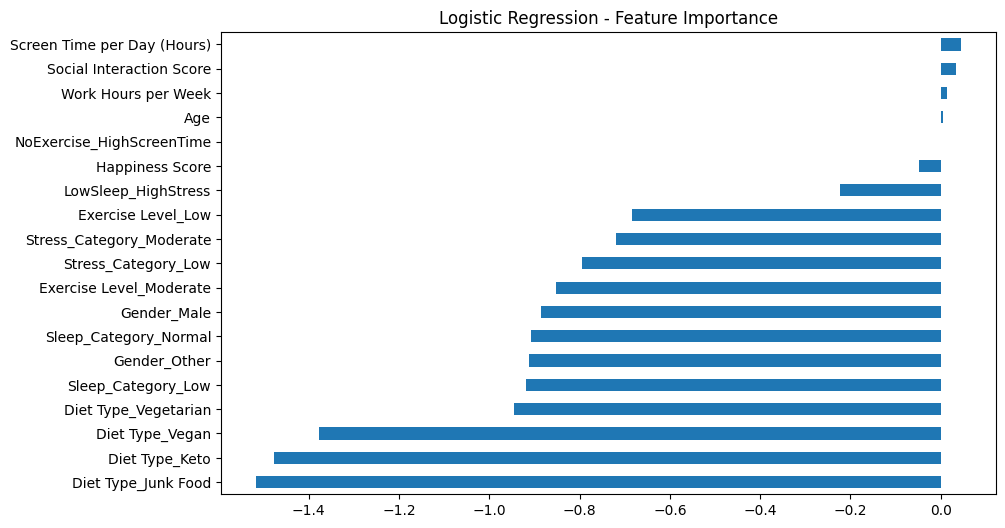

In [42]:
#View Coefficients (Feature Influence)
# Match coefficients to feature names
coefficients = pd.Series(logreg_model.coef_[0], index=X_train.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Logistic Regression - Feature Importance')
plt.show()


Random Forest based on SMOTEENN

In [43]:
#Import and Train Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [44]:
#Predict and Evaluate on Test Set
y_pred_rf = rf_model.predict(X_test)

print("🔍 Random Forest – Classification Report")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


🔍 Random Forest – Classification Report
              precision    recall  f1-score   support

           0       0.22      0.41      0.28       179
           1       0.81      0.64      0.71       721

    accuracy                           0.59       900
   macro avg       0.52      0.52      0.50       900
weighted avg       0.69      0.59      0.63       900

Confusion Matrix:
[[ 73 106]
 [262 459]]
ROC-AUC Score: 0.5096312539226245


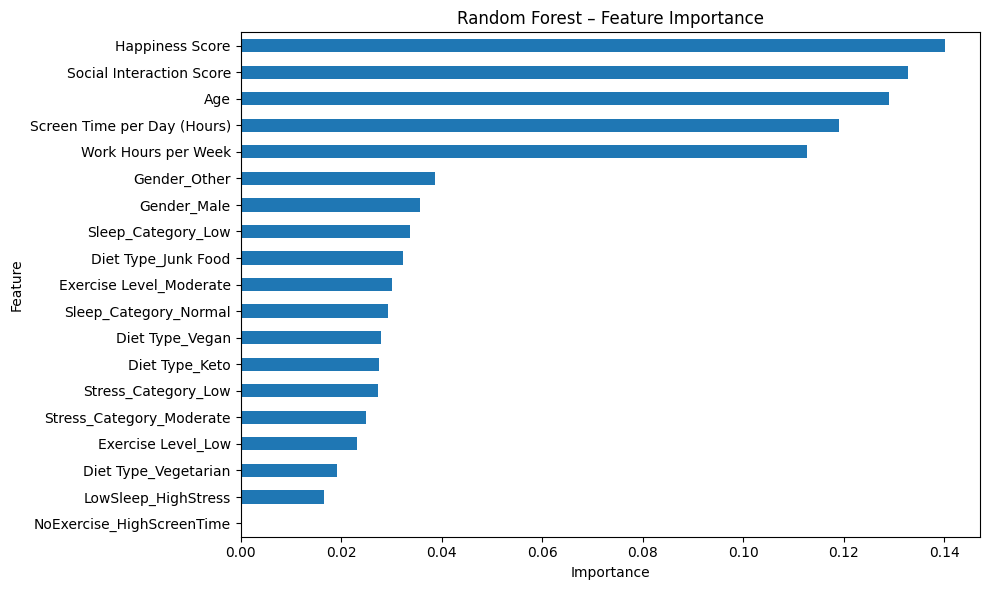

In [45]:
#Feature Importance Plot
import pandas as pd
import matplotlib.pyplot as plt

# Plot feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title('Random Forest – Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Compare Models

In [46]:
#Collect Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression scores
logreg_metrics = {
    'Model': 'Logistic Regression',
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1 Score': f1_score(y_test, y_pred_logreg),
    'ROC-AUC': roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
}

# Random Forest scores
rf_metrics = {
    'Model': 'Random Forest',
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
}


In [47]:
#Create and Display Comparison Table
import pandas as pd


comparison_df = pd.DataFrame([logreg_metrics, rf_metrics])
display(comparison_df)

,Model,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.803318,0.470180,0.593176,0.514021
1,Random Forest,0.812389,0.636616,0.713841,0.509631


Fine-tuning the better model: Random Forest

In [48]:
#Import Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [49]:
#Define Parameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [50]:
#Setup Grid Search
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=2)


In [51]:
#Run Grid Search on Resampled Training Data
grid_search.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [52]:
#View Best Parameters and Model
print("Best Parameters Found:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_


Best Parameters Found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [53]:
#Evaluate the Tuned Model on the Test Set
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_tuned = best_rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("ROC-AUC Score:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]))


Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.41      0.29       179
           1       0.81      0.64      0.72       721

    accuracy                           0.60       900
   macro avg       0.52      0.53      0.50       900
weighted avg       0.70      0.60      0.63       900

Confusion Matrix:
[[ 73 106]
 [256 465]]
ROC-AUC Score: 0.5171936866084503


Confusion Matrix

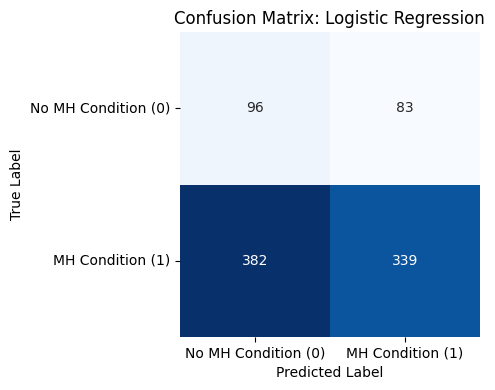

In [54]:
# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(5,4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['No MH Condition (0)', 'MH Condition (1)'])
plt.yticks([0.5, 1.5], ['No MH Condition (0)', 'MH Condition (1)'], rotation=0)
plt.tight_layout()
plt.show()

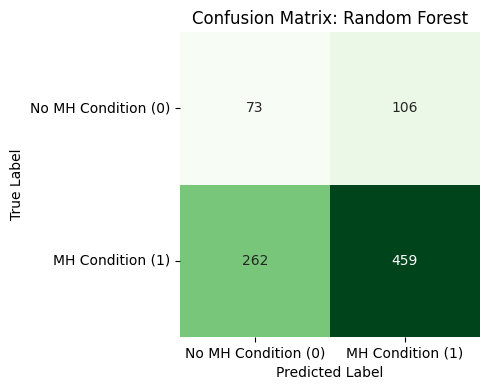

In [55]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['No MH Condition (0)', 'MH Condition (1)'])
plt.yticks([0.5, 1.5], ['No MH Condition (0)', 'MH Condition (1)'], rotation=0)
plt.tight_layout()
plt.show()

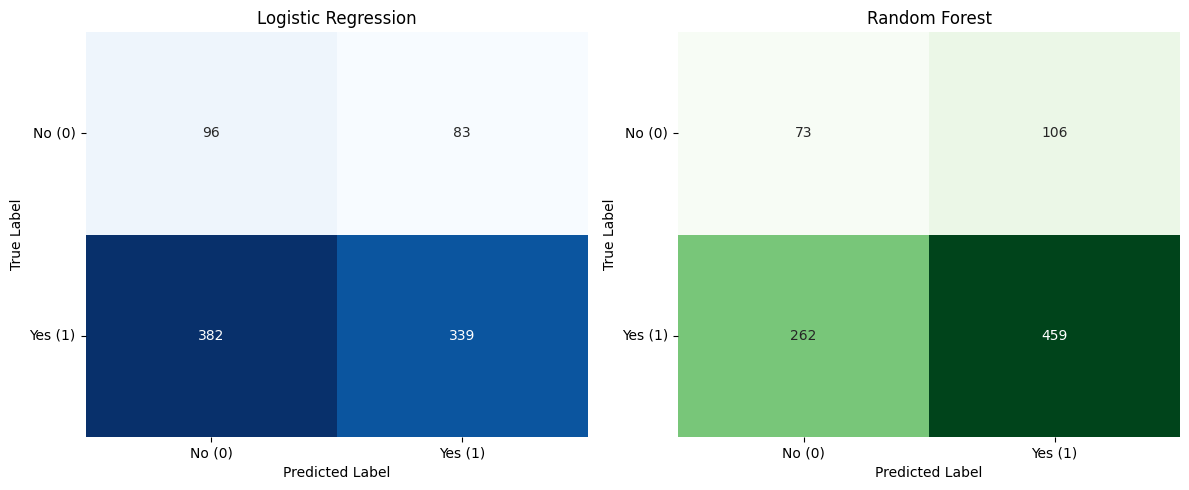

In [56]:
# Compute confusion matrices
cm_logreg = confusion_matrix(y_test, logreg_model.predict(X_test))
cm_rf = confusion_matrix(y_test, rf_model.predict(X_test))

# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticklabels(['No (0)', 'Yes (1)'])
axes[0].set_yticklabels(['No (0)', 'Yes (1)'], rotation=0)

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['No (0)', 'Yes (1)'])
axes[1].set_yticklabels(['No (0)', 'Yes (1)'], rotation=0)

plt.tight_layout()
plt.show()


In [57]:
# Evaluate
logreg_scores = {
    'Model': 'Logistic Regression',
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1 Score': f1_score(y_test, y_pred_logreg),
    'ROC-AUC': roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
}

rf_scores = {
    'Model': 'Random Forest',
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
}

df_scores = pd.DataFrame([logreg_scores, rf_scores])
df_scores.set_index('Model', inplace=True)

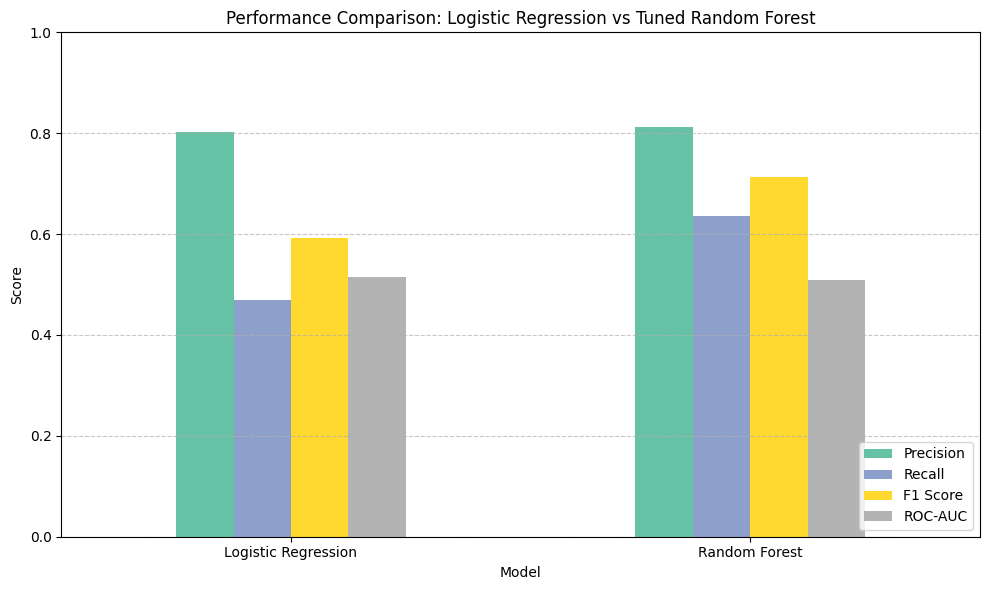

In [69]:
#Bar Chart to compare

# Plot
df_scores.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Performance Comparison: Logistic Regression vs Tuned Random Forest')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
